In [1]:
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.models import Sequential     

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print('xtrain:',x_train.shape)
print('xtest:',x_test.shape)
print('ytain:',y_train.shape)
print('ytest:',y_test.shape)


xtrain: (60000, 28, 28)
xtest: (10000, 28, 28)
ytain: (60000,)
ytest: (10000,)


In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')

])

In [5]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)

In [7]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6340 - accuracy: 0.8342 - val_loss: 0.3419 - val_accuracy: 0.9089
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3444 - accuracy: 0.9023 - val_loss: 0.2782 - val_accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2911 - accuracy: 0.9170 - val_loss: 0.2437 - val_accuracy: 0.9342
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2577 - accuracy: 0.9274 - val_loss: 0.2182 - val_accuracy: 0.9393
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2312 - accuracy: 0.9352 - val_loss: 0.1997 - val_accuracy: 0.9448
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2109 - accuracy: 0.9410 - val_loss: 0.1834 - val_accuracy: 0.9493
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1940 - accuracy: 0.9449 - val_loss: 0.1701 - val_ac

In [12]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 13432), started 0:01:27 ago. (Use '!kill 13432' to kill it.)

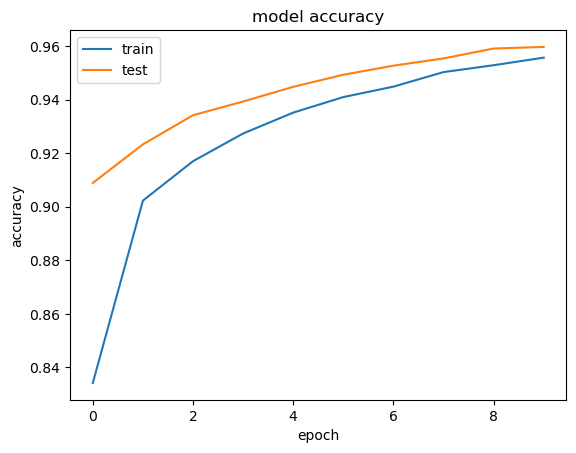

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

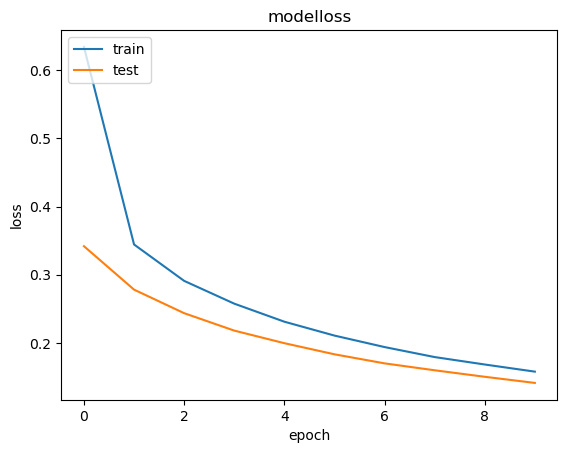

In [15]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelloss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()
     